scatter plot of Hail variables
to check the changes of the relationship of corrected variables
Ming Ge Sept 2024

In [2]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

In [3]:
lens_var_names = ['CAPEmax',
                'FLH',
                'CINmax',
                'VS06',
                'TotalTotal',
                'RH850']
n_var = len(lens_var_names)

# we use CAP,VS06, RH850 [0,3, 5]
lon_pt = -101 + 360
lat_pt = 35.5

dir_d = '/glade/campaign/mmm/c3we/mingge/QBE/'
flnm_cre = dir_d + 'hailpredictors_lens_01_corrected.nc'
flnm_org = dir_d + 'hailpredictors_lens_31window_01.nc'

# I radomly chose 1961  Julian day = 152-273 06/01-09/30
# 35N 102W
with xr.open_dataset(flnm_org) as ds:
    cap_org   = ds.hailpredictors[1,151:273,15,:,:,0].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    vs06_org  = ds.hailpredictors[1,151:273,15,:,:,3].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    rh850_org = ds.hailpredictors[1,151:273,15,:,:,5].sel(lat=lat_pt, lon=lon_pt, method="nearest")

with xr.open_dataset(flnm_cre) as ds:
    cap_cre   = ds.hailpredictors[1,151:273,:,:,0].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    vs06_cre  = ds.hailpredictors[1,151:273,:,:,3].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    rh850_cre = ds.hailpredictors[1,151:273,:,:,5].sel(lat=lat_pt, lon=lon_pt, method="nearest")

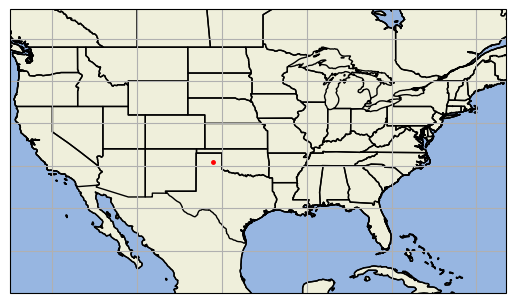

In [5]:
fig = plt.figure()
proj = ccrs.PlateCarree()
#ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

if lon_pt > 180:
    lon_pt - 360
    
ax = plt.axes(projection=proj)
ax.plot(lon_pt, lat_pt, marker='.', color='red', markersize=5, transform=proj)

ax.set_extent([-125, -66.5, 20, 50])
ax.coastlines()
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.gridlines()
 
plt.show()
 

<Figure size 720x720 with 0 Axes>

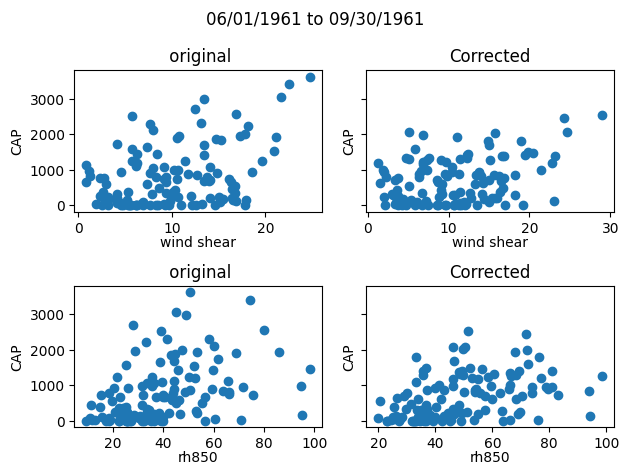

In [7]:
fig = plt.figure(figsize=(4, 4), dpi=180)    
fig, axes = plt.subplots(nrows = 2, ncols = 2,  sharey = True)
fig.suptitle('06/01/1961 to 09/30/1961')

axes[0][0].scatter(vs06_org, cap_org)
axes[0][0].set_title(" original")
axes[0][0].set_xlabel("wind shear", labelpad = 0)
axes[0][0].set_ylabel("CAP")

axes[0][1].scatter(vs06_cre, cap_cre)
axes[0][1].set_title("Corrected")
axes[0][1].set_xlabel("wind shear", labelpad = 0)
axes[0][1].set_ylabel("CAP")

axes[1][0].scatter(rh850_org, cap_org)
axes[1][0].set_title(" original")
axes[1][0].set_xlabel("rh850", labelpad = 0)
axes[1][0].set_ylabel("CAP")

axes[1][1].scatter(rh850_cre, cap_cre)
axes[1][1].set_title("Corrected")
axes[1][1].set_xlabel("rh850", labelpad = 0)
axes[1][1].set_ylabel("CAP")

fig.tight_layout(h_pad=1, w_pad=1);

In [9]:
flnm_cre = dir_d + 'hailpredictors_2085-2094lens_01_corrected.nc'
flnm_org = dir_d + 'hailpredictors_lens_31window_2075010100-2084123100_01.nc'

# I radomly chose 1961  Julian day = 152-273 06/01-09/30
# 35N 102W
with xr.open_dataset(flnm_org) as ds:
    cap_org   = ds.hailpredictors[1,151:273,15,:,:,0].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    vs06_org  = ds.hailpredictors[1,151:273,15,:,:,3].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    rh850_org = ds.hailpredictors[1,151:273,15,:,:,5].sel(lat=lat_pt, lon=lon_pt, method="nearest")

with xr.open_dataset(flnm_cre) as ds:
    cap_cre   = ds.hailpredictors[1,151:273,:,:,0].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    vs06_cre  = ds.hailpredictors[1,151:273,:,:,3].sel(lat=lat_pt, lon=lon_pt, method="nearest")
    rh850_cre = ds.hailpredictors[1,151:273,:,:,5].sel(lat=lat_pt, lon=lon_pt, method="nearest")

<Figure size 720x720 with 0 Axes>

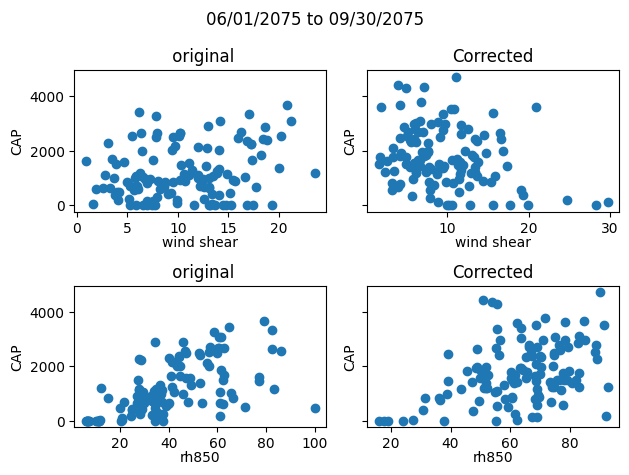

In [11]:
fig = plt.figure(figsize=(4, 4), dpi=180)    
fig, axes = plt.subplots(nrows = 2, ncols = 2,  sharey = True)
fig.suptitle('06/01/2075 to 09/30/2075')

axes[0][0].scatter(vs06_org, cap_org)
axes[0][0].set_title(" original")
axes[0][0].set_xlabel("wind shear", labelpad = 0)
axes[0][0].set_ylabel("CAP")

axes[0][1].scatter(vs06_cre, cap_cre)
axes[0][1].set_title("Corrected")
axes[0][1].set_xlabel("wind shear", labelpad = 0)
axes[0][1].set_ylabel("CAP")

axes[1][0].scatter(rh850_org, cap_org)
axes[1][0].set_title(" original")
axes[1][0].set_xlabel("rh850", labelpad = 0)
axes[1][0].set_ylabel("CAP")

axes[1][1].scatter(rh850_cre, cap_cre)
axes[1][1].set_title("Corrected")
axes[1][1].set_xlabel("rh850", labelpad = 0)
axes[1][1].set_ylabel("CAP")

fig.tight_layout(h_pad=1, w_pad=1)